<a href="https://colab.research.google.com/github/antoniogss/radiography_brazilian_universities_2021/blob/main/copiar_bds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

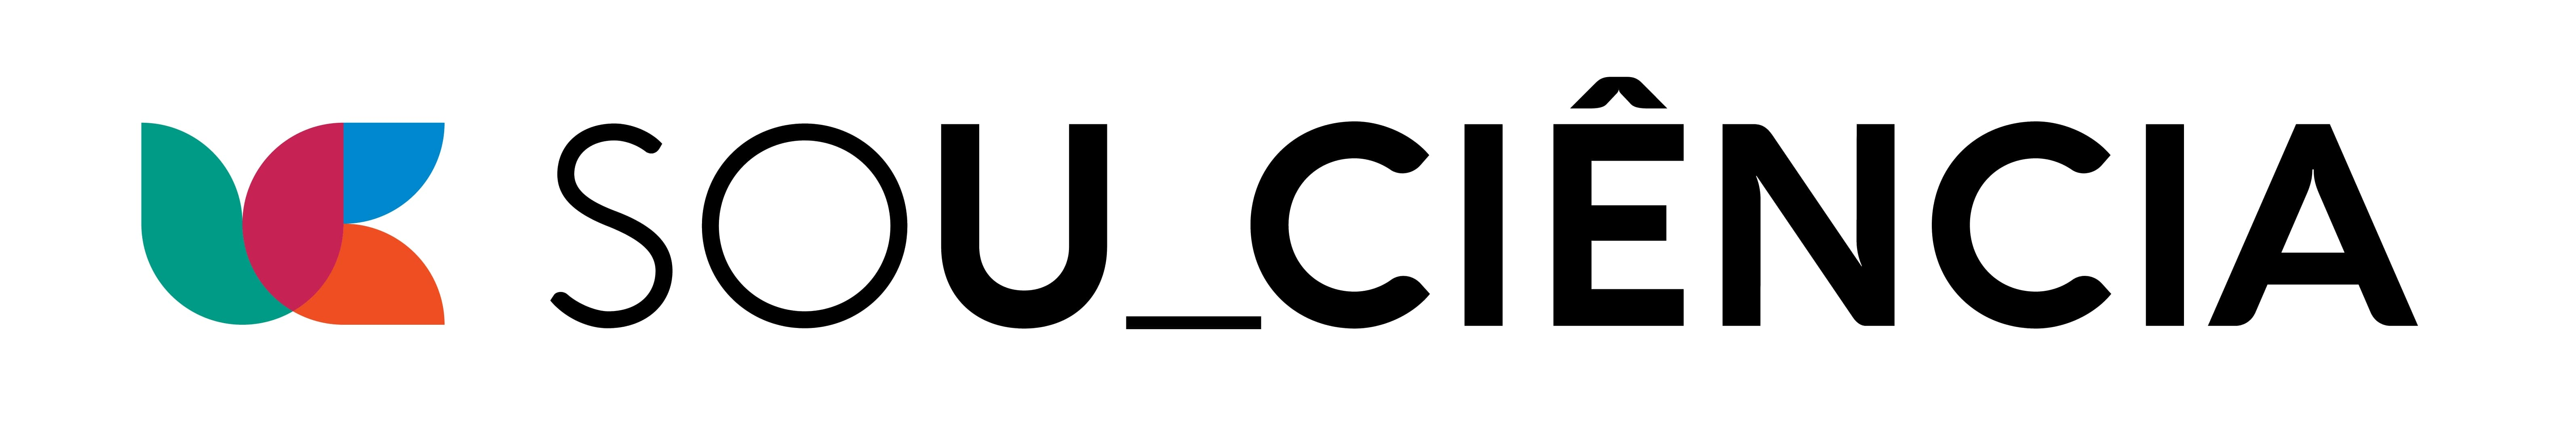

#Descrição

Desenvolvimento de um script Shell para copiar todos os subdiretórios e arquivos presentes no diretório de trabalho atual para um diretório de destino específico, ambos no Google Drive, normalizando os nomes de diretórios e arquivos para remover diacríticos, converter para minúsculas e substituir espaços por sublinhados. O diretório de destino é definido no início do código, e as funções normalize_for_copy e normalize_file_name são usadas para processar os nomes. O código cria um diretório normalizado no destino, copia os arquivos para ele e, em seguida, renomeia os arquivos internos normalizados.

Autor: Antonio Guerreiro Silva Serrano

Bolsista: Pesquisador de Apoio Técnico

Início: 16-08-2023

Atualizado: 21-08-2023

In [ ]:
# Bibliotecas já instaladas

import google.colab as gc

In [ ]:
# Integração com o Google Dive

gc.drive.mount('/content/drive')

gc.output.clear()

In [ ]:
# Definindo o diretório de trabalho atual (diretório a ser copiado)

%cd ./drive/Shared drives/SOU_CIÊNCIA (apoio técnico)/Radiografia das Universidades/

/content/drive/Shared drives/SOU_CIÊNCIA (apoio técnico)/Radiografia das Universidades


# Copiar subdiretórios e arquivos

In [ ]:
%%shell

# Define o diretório de destino para a cópia
dir_copia='/content/drive/MyDrive/SoU_Ciencia/radiografia_universidades_21/'

# Função para remover caracteres diacríticos, converter para minúsculas e substituir espaços por underline
normalize_for_copy() {
    echo "$1" | iconv -f utf-8 -t ascii//TRANSLIT | tr '[:upper:]' '[:lower:]' | tr ' ' '_'
}

# Função para normalizar o nome do arquivo
normalize_file_name() {
    echo "$1" | iconv -f utf-8 -t ascii//TRANSLIT | tr '[:upper:]' '[:lower:]' | tr ' ' '_'
}

# Copia os subdiretórios e arquivos do diretório atual para o diretório de destino
copy_files() {
    local source_dir="$1"
    local dest_dir="$2"

    # Copia subdiretórios e arquivos
    for item in "$source_dir"/*; do
        if [ -d "$item" ]; then
            # Cria o diretório correspondente no destino
            sub_dest_dir="$dest_dir/$(normalize_for_copy "$(basename "$item")")"
            mkdir -p "$sub_dest_dir"

            # Recursivamente copia os subdiretórios e arquivos dos subdiretórios
            copy_files "$item" "$sub_dest_dir"
        elif [ -f "$item" ]; then
            # Normaliza o nome do arquivo
            normalized_name=$(normalize_file_name "$(basename "$item")")

            # Copia o arquivo normalizado para o diretório de destino
            cp "$item" "$dest_dir/$normalized_name"
        fi
    done
}

# Copia os subdiretórios e arquivos do diretório atual para o diretório de destino
copy_files "." "${dir_copia}"

In [ ]:
%cd /content/drive/MyDrive/SoU_Ciencia/radiografia_universidades_21/

/content/drive/MyDrive/SoU_Ciencia/radiografia_universidades_21


# Renomeio automatizado de arquivos

O código abaixo tem como objetivo renomear subdiretórios e arquivos no diretório de trabalho atual. A função rename_items() percorre cada item, eliminando caracteres não alfanuméricos e substituindo-os por underscores, preservando o formato original. A renomeação abrange tanto subdiretórios quanto arquivos, contribuindo para nomes mais organizados e coerentes.

In [ ]:
%%shell

# Função para renomear subdiretórios e arquivos
rename_items() {
    for item in * */; do
        # Obter o nome do item sem a extensão (se for um arquivo)
        base=$(basename "$item")
        name_without_extension="${base%.*}"

        # Remover caracteres não alfanuméricos e separar palavras por "_"
        new_name=$(echo "$name_without_extension" | sed -E 's/[^a-zA-Z0-9]+/_/g')

        # Criar o novo nome do item com o formato
        new_base="$new_name${base##$name_without_extension}"

        # Criar o novo caminho
        new_path=$(dirname "$item")/$new_base

        # Renomear o item
        if [[ "$base" != "$new_base" ]]; then
            mv "$item" "$new_path"
        fi
    done
}

# Renomear subdiretórios e arquivos
rename_items

In [ ]:
# Lista todos os arquivos e diretórios de forma empilhada, incluindo
# subdiretórios e seus conteúdos, cada um em uma linha separada.

!ls -1R

.:
ces_2021
dados_capes
notebooks
relacionamentos

./ces_2021:
microdados_ces_2021

./dados_capes:
capes_curso.xlsx
capes_discente.xlsx
capes_docente.xlsx
capes_prog.xlsx

./notebooks:
armazenamento_google_drive.ipynb
copiar_bds.ipynb
correcao_bd_capes.ipynb
formatacao_caracteres.ipynb
insercao_bd_postgres.ipynb

./relacionamentos:
dicionario_dados_educacao_superior_2021.xlsx
relacionamentos_radigrafia_universidades.docx


# Instalação de aplicação no servidor Linux

Este código tem como objetivo verificar e instalar a aplicação ["tree"](https://www.geeksforgeeks.org/tree-command-unixlinux/) se ela não estiver disponível. A verificação é realizada sem exibir mensagens de instalação, e caso a aplicação seja instalada com sucesso, uma mensagem é exibida indicando que a aplicação foi instalada com êxito.

O comando "tree" é uma ferramenta de linha de comando que lista de forma hierárquica a estrutura de diretórios e arquivos em um sistema de arquivos.

In [ ]:
%%shell

# Definição de parâmetros de cor
GREEN_COLOR='\033[92m'
END_COLOR='\033[0m'

# Defina o nome da aplicação
nome_aplicacao="tree"

# Verificar e instalar a aplicação se necessário
if ! command -v "$nome_aplicacao" &> /dev/null; then
  apt-get update > /dev/null
  apt-get install -y "$nome_aplicacao" > /dev/null
  echo -e "${GREEN_COLOR}${nome_aplicacao}${END_COLOR} instalada com sucesso!"
fi

tree instalada com sucesso


In [ ]:
%%shell

tree -a ./

./
├── ces_2021
│   └── microdados_ces_2021
├── dados_capes
│   ├── capes_curso.xlsx
│   ├── capes_discente.xlsx
│   ├── capes_docente.xlsx
│   └── capes_prog.xlsx
├── notebooks
│   ├── armazenamento_google_drive.ipynb
│   ├── copiar_bds.ipynb
│   ├── correcao_bd_capes.ipynb
│   ├── formatacao_caracteres.ipynb
│   └── insercao_bd_postgres.ipynb
└── relacionamentos
    ├── dicionario_dados_educacao_superior_2021.xlsx
    └── relacionamentos_radigrafia_universidades.docx

4 directories, 12 files
